<a href="https://colab.research.google.com/github/piltom/widget_sketch_recon/blob/main/report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconocimiento de widgets a mano alzada para generar UIs a partir de un borrador
## Big Picture
Este trabajo es una parte de un proyecto más grande, en el cual se intenta generar una descripción de una interfaz de usuario a partir de una foto de un sketch en papel/pizarra. Con esta descripción se puede después generar código para algún lenguaje/framwork en particular (ReactJS, Qt, Gtk, etc.)
Un ejemplo de un par de sketch e interfaz es el siguiente:

![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/ideal_example/sketch1.jpg)
![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/ideal_example/final_result1.jpg)


##Este trabajo
En este trabajo, se asume que la imagen original ya fue segmentada en elementos únicos, los cuales deben ser clasificados en categorías. Los elementos posibles por el momento son:

###Checkbox:
![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/sample_elements/checkbox.png)
###Input
![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/sample_elements/input.png)

###Pushbutton:
![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/sample_elements/pushbutton.png)

###Radiobutton:
![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/sample_elements/radio1.png)
![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/sample_elements/radio2.png)

###Round Image:
![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/sample_elements/roundimg.png)

###Square Image:
![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/sample_elements/squareimg.png)

###Slider:
![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/sample_elements/slider.png)

###Switch:
![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/sample_elements/switch1.png)
![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/sample_elements/switch2.png)
![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/sample_elements/switch3.png)

###Text:
![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/sample_elements/text1.png)
![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/sample_elements/text2.png)

#Generación del dataset
El dataset fue dibujado sobre hojas cuadriculadas con lapicera azul, en formato de "sprite sheet" (rectángulos de un mismo tamaño contiguos). El fondo cuadriculado seguramente sea el "peor caso" de ruido de fondo posible, ya que alternativamente podría ser una hoja rayada o una pizarra. Se dibujaron diversas variaciones de cada elemento, utilizando distintos trazos (continuos, lineas, figuras que no llegan a cerrar, partes pintadas, etc.). En [MEGA](https://mega.nz/file/IUhz3KoB#ZqoRcKabLWs6Y8_xd8Rqv8WJIc1NzcchaOsEAV8c6n0) se encuentran tanto los "sprite sheets" como cada "tile" separado.

#Procesamiento y extracción de features
##Preprocesamiento
Antes de poder extraer features de las imágenes, se debe ajustar el tamaño de las imágenes y filtrar el fondo cuadriculado. Para esto se utiliza el script [adecuate.py](https://github.com/piltom/widget_sketch_recon/blob/main/util_test_scripts/adecuate.py), que cambia el tamaño de las imágenes para que tengan 256 pixeles de ancho y aplica un [threshold Li](https://scikit-image.org/docs/dev/auto_examples/developers/plot_threshold_li.html) para filtrar el fondo.

Un ejemplo del resultado de esta adecuación es:

![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/img/pushbutton/tile008_p.png)

**Nota: Posiblemente se podría reducir el tamaño de las imágenes aún más, cortando las partes negras en los bordes.**

##Features
Para este trabajo se consideraron tres métodos de extracción de features diferentes, con los cuales se generaron diversos dataframes alterando parámetros y se analizó la efectividad de los mismos usando un Support Vector Classifier y un Random Forest Classifier. Para generar los dataframes se utilizaron los scripts [create_widget_dataset.py](https://github.com/piltom/widget_sketch_recon/blob/main/create_widget_dataset.py) (ORB), [create_widget_dataset_hough.py](https://github.com/piltom/widget_sketch_recon/blob/main/create_widget_dataset_hough.py) (Transformada de Hough), [create_widget_dataset_houghncross.py](https://github.com/piltom/widget_sketch_recon/blob/main/create_widget_dataset_houghncross.py) (Transformada de Hough y cruce de lineas en centroide)


In [1]:
!mkdir dataroot 
!wget -P dataroot https://github.com/piltom/widget_sketch_recon/raw/main/dataset_img_ORB_200.pkl
!wget -P dataroot https://github.com/piltom/widget_sketch_recon/raw/main/dataset_img_ORB50.pkl
!wget -P dataroot https://github.com/piltom/widget_sketch_recon/raw/main/dataset_img_hough5cross_fullsize.pkl
!wget -P dataroot https://github.com/piltom/widget_sketch_recon/raw/main/dataset_img_hough7_fullsize.pkl
!wget -P dataroot https://github.com/piltom/widget_sketch_recon/raw/main/dataset_img_hough7_8thsize.pkl
!wget -P dataroot https://github.com/piltom/widget_sketch_recon/raw/main/dataset_img_hough5_doublefullsize.pkl
!wget -P dataroot https://github.com/piltom/widget_sketch_recon/raw/main/dataset_img_hough5_fullsize.pkl
!pip3 install pickle5

--2021-02-16 18:37:05--  https://github.com/piltom/widget_sketch_recon/raw/main/dataset_img_ORB_200.pkl
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/dataset_img_ORB_200.pkl [following]
--2021-02-16 18:37:05--  https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/dataset_img_ORB_200.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34379170 (33M) [application/octet-stream]
Saving to: ‘dataroot/dataset_img_ORB_200.pkl’

dataset_img_ORB_200 100%[===================>]  32.79M   104MB/s    in 0.3s    

2021-02-16 18:37:07 (104 MB/s) - ‘dataroot/datase

##ORB
Oriented FAST and Rotated Brief es un detector de features locales robusto que se utiliza frecuentemente en tareas de reconocimiento de objetos y reconstrucción 3D. Es robusto frente a rotaciones y cambios de escala, por lo que es muy útil cuando se tratan objetos 3D tomados desde distintos ángulos.

Para este caso se creo un dataset utilizando 50 keypoints. El resultado obtenido se muestra a continuación, seguido de una explicación de su falla para este caso.
###ORB con 50 keypoints
Cargamos el dataset. Nótese la gran cantidad de columnas que tiene.

In [2]:
from sklearn import svm, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import pickle5 as pickle

classifiersvc = svm.LinearSVC()
classifierrf = RandomForestClassifier()
with open("dataroot/dataset_img_ORB50.pkl", "rb") as fh:
  datasetorb50_df = pickle.load(fh)
datasetorb50_df


,filename,target,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,12762,12763,12764,12765,12766,12767,12768,12769,12770,12771,12772,12773,12774,12775,12776,12777,12778,12779,12780,12781,12782,12783,12784,12785,12786,12787,12788,12789,12790,12791,12792,12793,12794,12795,12796,12797,12798,12799,12800,12801
0,tile018_p.png,checkbox,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,tile061_p.png,checkbox,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,tile040_p.png,checkbox,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,tile037_p.png,checkbox,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,True,False,True,True,False,False,False,False,False,False,True,False,False,True,False,True,False,False,True,True,True,True,False,False,True,True,False,False,True,False,False,False,False,True,False,True,True,False,False
4,tile049_p.png,checkbox,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,tile012_p.png,text,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,...,False,False,True,False,True,True,False,False,False,False,False,False,False,False,True,True,True,False,False,False,True,True,True,True,False,True,True,False,False,False,True,False,False,True,False,False,False,True,False,False
435,tile019_p.png,text,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,

Separamos el dataset en datos de entrenamiento y de testeo, y los utilizamos para entrenar un Support Vector Classifier y un Random Forest Classifier. A continuación se muestran las matrices de confusión para el SVC y el random forest (respecticamente):

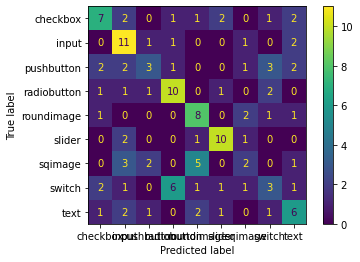

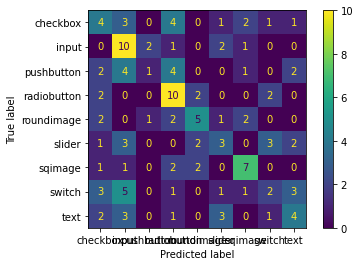

In [4]:
X=datasetorb50_df.drop(['target', 'filename'], axis=1)
y=datasetorb50_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11, stratify=y)

# Aprenda a clasificar el conjunto de entrenamiento
classifiersvc.fit(X_train, y_train)
classifierrf.fit(X_train, y_train)
y_predictedsvc = classifiersvc.predict(X_test)
y_predictedrf = classifierrf.predict(X_test)
metrics.plot_confusion_matrix(classifiersvc, X_test, y_test)
metrics.plot_confusion_matrix(classifierrf, X_test, y_test)

In [5]:
print("Classification report for classifier {}\n{}\n".format(classifiersvc, metrics.classification_report(y_test, y_predictedsvc)))
print("Classification report for classifier {}\n{}\n".format(classifierrf, metrics.classification_report(y_test, y_predictedrf)))

Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
              precision    recall  f1-score   support

    checkbox       0.50      0.44      0.47        16
       input       0.46      0.69      0.55        16
  pushbutton       0.38      0.21      0.27        14
 radiobutton       0.53      0.62      0.57        16
  roundimage       0.44      0.62      0.52        13
      slider       0.67      0.71      0.69        14
     sqimage       0.25      0.15      0.19        13
      switch       0.27      0.19      0.22        16
        text       0.40      0.43      0.41        14

    accuracy                           0.45       132
   macro avg       0.43      0.45      0.43       132
weighted avg       0.43      0.45      0.43       132


Classification report for c

Como se puede observar en la tabla, los resultados están lejos de ser ideales. Se logra apenas una precisión promedio de 0.43 con el clasificador SVC.
Instintivamente uno podría pensar que se trata de un dataset con pocos keypoints, pero no es el caso. ORB es útil en general cuando se trata de imágenes de un mismo objeto, tomadas con distintos ángulos o a distintas distancias. El hecho de que ORB sea robusto ante cambios de tamaño y rotaciones juega en contra parcialmente, ya que algunos widgets pueden confundirse entre sí, si se rotan y escalan. Para este caso, es necesario comparar las similitudes en la construcción geométrica de los dibujos.

##Transformada de Hough con ángulos discretos
Una gran alternativa a utilizar ORB es la [transformada de Hough](https://en.wikipedia.org/wiki/Hough_transform). Esta técnica detecta la presencia de formas (en este caso líneas rectas) mediante un procesimiento de votación. Se obtienen las líneas dominantes, parametrizadas por su ángulo y largo. Luego se agregó un pequeño código que discretiza estos ángulos a un cierto intervalo entre -pi y pi. Se probó dividir dicho intervalo en 5, 7 y 13 partes. Luego se hace un recuento de cuantas líneas para cada ángulo discreto hay y se suman los largos en valor absoluto. De esta forma se tiene un dataset angosto pero con alta cantidad de información sobre las formas de cada dibujo. Estos datasets se generaron con el script [create_widget_dataset_hough.py](https://github.com/piltom/widget_sketch_recon/blob/main/create_widget_dataset_hough.py).


### Hough con 7 ángulos discretos
Empezamos por cargar el dataset. Nótese que sólo tiene 16 columnas, de las cuales 14 son features. Las columnas fueron normalizadas.

In [6]:
classifiersvc = svm.LinearSVC()
classifierrf = RandomForestClassifier()
with open("dataroot/dataset_img_hough7_fullsize.pkl", "rb") as fh:
  datasethough7f_df = pickle.load(fh)
datasethough7f_df

,filename,target,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,tile018_p.png,checkbox,0.125,0.0,0.047619,0.142857,0.1,0.000,0.375,0.208252,0.0,0.037594,0.136048,0.106304,0.000000,0.380792
1,tile061_p.png,checkbox,0.125,0.0,0.047619,0.142857,0.1,0.000,0.125,0.034466,0.0,0.052632,0.151856,0.109470,0.000000,0.153587
2,tile040_p.png,checkbox,0.125,0.0,0.000000,0.142857,0.1,0.000,0.125,0.096602,0.0,0.000000,0.142754,0.118438,0.000000,0.155082
3,tile037_p.png,checkbox,0.250,0.0,0.000000,0.071429,0.1,0.000,0.000,0.264078,0.0,0.000000,0.043353,0.105777,0.000000,0.000000
4,tile049_p.png,checkbox,0.625,0.0,0.000000,0.142857,0.1,0.000,0.000,0.666505,0.0,0.000000,0.134132,0.101556,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,tile012_p.png,text,0.000,0.0,0.000000,0.000000,0.0,0.000,0.125,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.112481
435,tile019_p.png,text,0.250,0.0,0.000000,0.000000,0.0,0.125,0.125,0.187379,0.0,0.000000,0.000000,0.000000,0.089614,0.096786
436,tile045_p.png,text,0.000,0.0,0.000000,0.000000,0.0,0.125,0.250,0.000000,0.0,0.000000,0.000000,0.000000,0.087080,0.205531
437,tile001_p.png,text,0.000,0.0,0.000000,0.000000,0.0,0.000,0.125,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.099028


Luego se entrena el SVC y el Random Forest y se grafican la matrices de confusión (arriba SVC, abajo Random Forest).

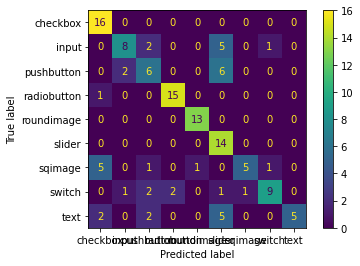

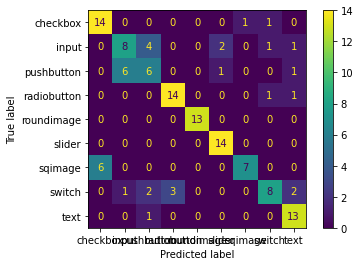

In [7]:
X=datasethough7f_df.drop(['target', 'filename'], axis=1)
y=datasethough7f_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11, stratify=y)

# Aprenda a clasificar el conjunto de entrenamiento
classifiersvc.fit(X_train, y_train)
classifierrf.fit(X_train, y_train)
y_predictedsvc = classifiersvc.predict(X_test)
y_predictedrf = classifierrf.predict(X_test)
metrics.plot_confusion_matrix(classifiersvc, X_test, y_test)
metrics.plot_confusion_matrix(classifierrf, X_test, y_test)

La matriz de confusión nos da un indicio de que si bien los resultados son mucho mejor que con ORB, aun hay ciertas clases que se confunden. Por ejemplo, la clase "switch" es muy facilmente confundida con otras. La clase sqimage se confunde mucho con checkbox, y la clase input con pushbutton.

In [8]:
print("Classification report for classifier {}\n{}\n".format(classifiersvc, metrics.classification_report(y_test, y_predictedsvc)))
print("Classification report for classifier {}\n{}\n".format(classifierrf, metrics.classification_report(y_test, y_predictedrf)))

Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
              precision    recall  f1-score   support

    checkbox       0.67      1.00      0.80        16
       input       0.73      0.50      0.59        16
  pushbutton       0.46      0.43      0.44        14
 radiobutton       0.88      0.94      0.91        16
  roundimage       0.93      1.00      0.96        13
      slider       0.45      1.00      0.62        14
     sqimage       0.83      0.38      0.53        13
      switch       0.82      0.56      0.67        16
        text       1.00      0.36      0.53        14

    accuracy                           0.69       132
   macro avg       0.75      0.69      0.67       132
weighted avg       0.75      0.69      0.68       132


Classification report for c

Los resultados obtenidos superan ampliamente a los obtenidos con ORB. Sin embargo, hay lugar para mejoras. En un principio, se podría probar si reducir la imagen de la cual se extraen las features mejora o empeora los resultados. Sería posible que los resultados mejoren en el caso de que líneas imperfectas se vuelvan más rectas.
###Hough con 7 ángulos discretos, imagen de 1/8 de tamaño
Para este dataset se achicaron las imágenes por ocho a lo largo y a lo ancho antes de extraer las features.
Cargamos el dataset:

In [9]:
classifiersvc = svm.LinearSVC()
classifierrf = RandomForestClassifier()
with open("dataroot/dataset_img_hough7_8thsize.pkl", "rb") as fh:
  datasethough7_8_df = pickle.load(fh)
datasethough7_8_df

,filename,target,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,tile018_p.png,checkbox,0.00,0.25,0.4,0.333333,0.50,0.666667,0.666667,0.000000,0.70,0.192183,0.431818,0.509804,0.705882,0.713178
1,tile061_p.png,checkbox,0.25,0.50,0.4,0.500000,0.25,0.000000,0.666667,0.080882,0.56,0.168160,0.573864,0.250000,0.000000,0.527132
2,tile040_p.png,checkbox,0.25,0.50,0.2,0.500000,0.25,0.333333,0.333333,0.227941,0.40,0.300285,0.585227,0.269608,0.462185,0.410853
3,tile037_p.png,checkbox,0.50,0.50,0.4,0.333333,0.50,0.333333,1.000000,0.367647,0.52,0.456434,0.352273,0.500000,0.428571,1.000000
4,tile049_p.png,checkbox,0.50,0.25,0.4,0.500000,0.50,0.000000,0.666667,0.397059,0.54,0.168160,0.619318,0.470588,0.000000,0.589147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,tile012_p.png,text,0.00,0.00,0.0,0.000000,0.00,0.000000,0.333333,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.302326
435,tile019_p.png,text,0.00,0.00,0.0,0.000000,0.00,0.000000,0.333333,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.255814
436,tile045_p.png,text,0.00,0.25,0.0,0.000000,0.00,0.333333,0.333333,0.000000,0.02,0.000000,0.000000,0.000000,0.294118,0.240310
437,tile001_p.png,text,0.00,0.00,0.0,0.000000,0.00,0.000000,0.333333,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.255814


A continuación se muestran las matrices de confusión para el SVC y el random forest (respecticamente):

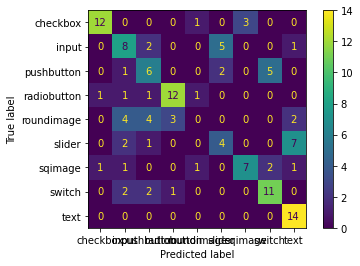

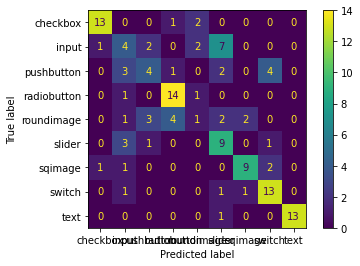

In [10]:
X=datasethough7_8_df.drop(['target', 'filename'], axis=1)
y=datasethough7_8_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11, stratify=y)

# Aprenda a clasificar el conjunto de entrenamiento
classifiersvc.fit(X_train, y_train)
classifierrf.fit(X_train, y_train)
y_predictedsvc = classifiersvc.predict(X_test)
y_predictedrf = classifierrf.predict(X_test)
metrics.plot_confusion_matrix(classifiersvc, X_test, y_test)
metrics.plot_confusion_matrix(classifierrf, X_test, y_test)

En las matrices de confusión se puede apreciar que la clasificación de las clases empeora en general, aunque notablemente para "roundimage".

In [11]:
print("Classification report for classifier {}\n{}\n".format(classifiersvc, metrics.classification_report(y_test, y_predictedsvc)))
print("Classification report for classifier {}\n{}\n".format(classifierrf, metrics.classification_report(y_test, y_predictedrf)))

Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
              precision    recall  f1-score   support

    checkbox       0.86      0.75      0.80        16
       input       0.42      0.50      0.46        16
  pushbutton       0.38      0.43      0.40        14
 radiobutton       0.75      0.75      0.75        16
  roundimage       0.00      0.00      0.00        13
      slider       0.36      0.29      0.32        14
     sqimage       0.70      0.54      0.61        13
      switch       0.61      0.69      0.65        16
        text       0.56      1.00      0.72        14

    accuracy                           0.56       132
   macro avg       0.52      0.55      0.52       132
weighted avg       0.53      0.56      0.53       132


Classification report for c

Claramente, no se trata de una mejora. Otro posible cambio, trabajando nuevamente sobre las imágenes de tamaño original (256px de ancho), es aumentar o disminuir la cantidad de ángulos discretos.

### Hough con 5 ángulos discretos
En este caso, se cambia la cantidad de ángulos discretos para agrupar los resultados de la transformada de Hough a 5.
Cargamos los datos:

In [12]:
classifiersvc = svm.LinearSVC()
classifierrf = RandomForestClassifier()
with open("dataroot/dataset_img_hough5_fullsize.pkl", "rb") as fh:
  datasethough5_df = pickle.load(fh)
datasethough5_df

,filename,target,2,3,4,5,6,7,8,9,10,11
0,tile018_p.png,checkbox,0.083333,0.035714,0.10,0.083333,0.3,0.176689,0.028409,0.099093,0.084486,0.292984
1,tile061_p.png,checkbox,0.083333,0.000000,0.15,0.083333,0.1,0.029242,0.000000,0.133810,0.087002,0.118171
2,tile040_p.png,checkbox,0.083333,0.000000,0.10,0.083333,0.1,0.081960,0.000000,0.103978,0.094130,0.119321
3,tile037_p.png,checkbox,0.166667,0.000000,0.05,0.083333,0.0,0.224053,0.000000,0.031577,0.084067,0.000000
4,tile049_p.png,checkbox,0.416667,0.000000,0.10,0.083333,0.0,0.565486,0.000000,0.097697,0.080713,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
434,tile012_p.png,text,0.000000,0.000000,0.00,0.000000,0.1,0.000000,0.000000,0.000000,0.000000,0.086544
435,tile019_p.png,text,0.166667,0.000000,0.00,0.083333,0.1,0.158979,0.000000,0.000000,0.059329,0.074468
436,tile045_p.png,text,0.000000,0.000000,0.00,0.083333,0.2,0.000000,0.000000,0.000000,0.057652,0.158137
437,tile001_p.png,text,0.000000,0.000000,0.00,0.000000,0.1,0.000000,0.000000,0.000000,0.000000,0.076193


A continuación se muestran las matrices de confusión para el SVC y el random forest (respecticamente):

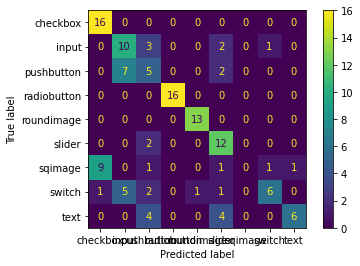

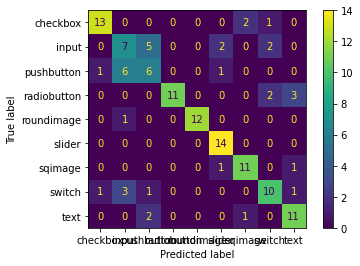

In [14]:
X=datasethough5_df.drop(['target', 'filename'], axis=1)
y=datasethough5_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10, stratify=y)

# Aprenda a clasificar el conjunto de entrenamiento
classifiersvc.fit(X_train, y_train)
classifierrf.fit(X_train, y_train)
y_predictedsvc = classifiersvc.predict(X_test)
y_predictedrf = classifierrf.predict(X_test)
metrics.plot_confusion_matrix(classifiersvc, X_test, y_test)
metrics.plot_confusion_matrix(classifierrf, X_test, y_test)

In [15]:
print("Classification report for classifier {}\n{}\n".format(classifiersvc, metrics.classification_report(y_test, y_predictedsvc)))
print("Classification report for classifier {}\n{}\n".format(classifierrf, metrics.classification_report(y_test, y_predictedrf)))

Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
              precision    recall  f1-score   support

    checkbox       0.62      1.00      0.76        16
       input       0.45      0.62      0.53        16
  pushbutton       0.29      0.36      0.32        14
 radiobutton       1.00      1.00      1.00        16
  roundimage       0.93      1.00      0.96        13
      slider       0.55      0.86      0.67        14
     sqimage       0.00      0.00      0.00        13
      switch       0.75      0.38      0.50        16
        text       0.86      0.43      0.57        14

    accuracy                           0.64       132
   macro avg       0.61      0.63      0.59       132
weighted avg       0.61      0.64      0.60       132


Classification report for c

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Los resultados para el SVC son peores, pero en el caso del Random Forest, podemos obtener resultados similares con un dataset menos ancho. Aunque la ganancia en métricas es inexistente, podemos obtener los mismos resultados con menos información.
Analizando los resultados se puede concluir que hay dos clases que están dando problemas graves: input y pushbutton. Esto salta a la vista en las matrices de confusión, como un pequeño cuadrado celeste (cuadrado de 2x2 en columna 2, fila 2). Los dibujos para estas dos clases se muestran a continuación:

Input:
![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/sample_elements/input.png)

Pushbutton:
![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/sample_elements/pushbutton.png)

La única diferencia entre estas dos clases es la línea de texto dentro del rectángulo. Para mejorar las métricas, se deben extraer features que diferencien claramente una de otra.

##Transformada de Hough y cruce de lineas en centroide

Una característica que diferencia claramente las clases mencionadas con anterioridad es la cantidad de líneas que se cruzan al trazar una linea vertical y una horizontal en el centroide del dibujo. El centroide es la media de las posiciones de los pixeles coloreados (al aplicar el threshold Li, los pixeles son negros o blancos).

###Hough con 5 ángulos discretos y conteo de cruces
Utilizando 5 ángulos discretos para los resultados de la transformada de Hough y contando el cruce de líneas mencionado con anterioridad, se obtiene el siguiente dataset:

In [29]:
classifiersvc = svm.LinearSVC()
classifierrf = RandomForestClassifier()
with open("dataroot/dataset_img_hough5cross_fullsize.pkl", "rb") as fh:
  datasethough5c_df = pickle.load(fh)
datasethough5c_df

,filename,target,2,3,4,5,6,7,8,9,10,11,12,13
0,tile018_p.png,checkbox,0.083333,0.035714,0.10,0.083333,0.3,0.176689,0.028409,0.099093,0.084486,0.292984,0.25,0.157895
1,tile061_p.png,checkbox,0.083333,0.000000,0.15,0.083333,0.1,0.029242,0.000000,0.133810,0.087002,0.118171,0.25,0.157895
2,tile040_p.png,checkbox,0.083333,0.000000,0.10,0.083333,0.1,0.081960,0.000000,0.103978,0.094130,0.119321,0.25,0.210526
3,tile037_p.png,checkbox,0.166667,0.000000,0.05,0.083333,0.0,0.224053,0.000000,0.031577,0.084067,0.000000,0.25,0.210526
4,tile049_p.png,checkbox,0.416667,0.000000,0.10,0.083333,0.0,0.565486,0.000000,0.097697,0.080713,0.000000,0.25,0.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,tile012_p.png,text,0.000000,0.000000,0.00,0.000000,0.1,0.000000,0.000000,0.000000,0.000000,0.086544,0.00,0.000000
435,tile019_p.png,text,0.166667,0.000000,0.00,0.083333,0.1,0.158979,0.000000,0.000000,0.059329,0.074468,0.00,0.105263
436,tile045_p.png,text,0.000000,0.000000,0.00,0.083333,0.2,0.000000,0.000000,0.000000,0.057652,0.158137,0.00,0.000000
437,tile001_p.png,text,0.000000,0.000000,0.00,0.000000,0.1,0.000000,0.000000,0.000000,0.000000,0.076193,0.00,0.000000


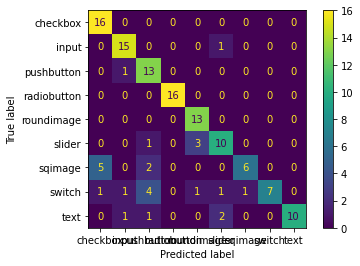

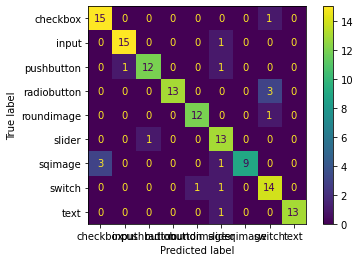

In [30]:
X=datasethough5c_df.drop(['target', 'filename'], axis=1)
y=datasethough5c_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10, stratify=y)

# Aprenda a clasificar el conjunto de entrenamiento
classifiersvc.fit(X_train, y_train)
classifierrf.fit(X_train, y_train)
y_predictedsvc = classifiersvc.predict(X_test)
y_predictedrf = classifierrf.predict(X_test)
metrics.plot_confusion_matrix(classifiersvc, X_test, y_test)
metrics.plot_confusion_matrix(classifierrf, X_test, y_test)

En estas matrices de confusión es posible apreciar cómo el problema de confusión entre input y pushbutton desapareció. También mejoró la clasificación de otras clases.
Es notable la superioridad que presenta el RandomForestClassifier frente al Suport Vector Classifier.
Un detalle interesante quizás es que entre un clasificador y otro, la clasificación de las clases switch y sqimage mejora sustancialmente.

In [31]:
print("Classification report for classifier {}\n{}\n".format(classifiersvc, metrics.classification_report(y_test, y_predictedsvc)))
print("Classification report for classifier {}\n{}\n".format(classifierrf, metrics.classification_report(y_test, y_predictedrf)))

Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
              precision    recall  f1-score   support

    checkbox       0.73      1.00      0.84        16
       input       0.83      0.94      0.88        16
  pushbutton       0.62      0.93      0.74        14
 radiobutton       1.00      1.00      1.00        16
  roundimage       0.76      1.00      0.87        13
      slider       0.71      0.71      0.71        14
     sqimage       0.86      0.46      0.60        13
      switch       1.00      0.44      0.61        16
        text       1.00      0.71      0.83        14

    accuracy                           0.80       132
   macro avg       0.84      0.80      0.79       132
weighted avg       0.84      0.80      0.79       132


Classification report for c

Los resultados del clasificador Random Forest son excelentes y permitirían una clasificación funcional para el programa. Es posible seguramente analizar las clases que peor performance tienen, como "switch", para extraer nuevas features que mejoren la clasificación.

Es importante tener en cuenta también que en una siguiente etapa se utilizarán los resultados de este clasificador, la posición del widget y los widgets adyacentes para verificar y tal vez corregir los resultados.